In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"D:\athlete_events.csv")
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


How old were the youngest men and women who participated in the 1992 Olympic Games?

In [3]:
minF = df.loc[(df['Year'] == 1992) & (df['Sex'] == 'F')]['Age'].min()
minM = df.loc[(df['Year'] == 1992) & (df['Sex'] == 'M')]['Age'].min()
# print("The min age of female was", minF, "in 1992 year. The min age of male was", minM, "in 1992 year. ")
print("The min age of female was {0} min 1992 year. The min age of male was {1} in 1992 year.".format(minF, minM))

The min age of female was 12.0 min 1992 year. The min age of male was 11.0 in 1992 year.


What is the percentage of male basketball players among all male competitors in the 2012 Olympic Games? Round the answer to the first decimal place. Hint: here and if necessary, take into account athletes who participated in different competitions only once.

In [4]:
basket2012 =df.loc[(df['Sport'] == 'Basketball') &
                      (df['Sex'] == 'M') & 
                      (df['Year'] == 2012)]['ID'].drop_duplicates().shape[0]
all2012 = df.loc[(df['Sex'] == 'M') & (df['Year'] == 2012)]['ID'].drop_duplicates().shape[0]
print(np.round(basket2012/all2012*100, 1), "%")
               

2.5 %


What is the average height of female tennis players who participated in the 2000 Olympic Games? Round the answer to the first decimal place.

In [5]:
tennis2000 = df.loc[(df['Sport'] == 'Tennis') &
                    (df['Sex'] == 'F') &
                    (df['Year'] == 2000)][['ID', 'Height']].drop_duplicates()['Height'].mean()
print(np.round(tennis2000, 1), " cm")

171.8  cm


Find the athlete who participated in the 2006 Olympic Games and who had the heaviest weight among the participants of that Olympics. What sport did he play?

In [6]:
max_weight = df.loc[(df['Year']==2006)]['Weight'].max()
display(df.loc[(df['Sex']=='M')&(df['Year']==2006)&(df['Weight']==max_weight)])
print("The sport is " + df.loc[(df['Sex']=='M')&(df['Year']==2006)&(df['Weight']==max_weight)]['Sport'])

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
8102,4476,Patrick R. Antaki,M,41.0,185.0,127.0,Lebanon,LIB,2006 Winter,2006,Winter,Torino,Skeleton,Skeleton Men's Skeleton,NaN


8102    The sport is Skeleton
Name: Sport, dtype: object


How many gold medals in tennis did athletes from the Swiss team win at the 2008 Olympic Games? Count each medal from each athlete.

In [5]:
amount = df.loc[(df['Sport'] == 'Tennis') & 
                (df['Team'].str.contains("Switzerland")) & 
                (df['Year'] == 2008) & 
                (df['Medal'] == 'Gold')].shape[0]
print("Has been won " + str(amount) + " gold medals")

Has been won 2 gold medals


Is it true that Spain won fewer medals than Italy in the 2016 Olympics? Display the number of medals won by these countries. Ignore NaNs in the Medal column.

In [8]:
spain_medal = df.loc[(df['Year']==2016)&(df['Team'].str.contains('Spain'))][['Event', 'Medal']].drop_duplicates()['Medal'].value_counts().sum()
italy_medal = df.loc[(df['Year']==2016)&(df['Team'].str.contains('Italy'))][['Event', 'Medal']].drop_duplicates()['Medal'].value_counts().sum()
if spain_medal < italy_medal: 
   print("True. Spain won fewer medals than Italy in 2016")
else:
   print("Lie. Spain won fewer medals than Italy in 2016")

print("Spain won " + str(spain_medal) + " medals, and Italy won " + str(italy_medal) + " medals.")

True. Spain won fewer medals than Italy in 2016
Spain won 17 medals, and Italy won 28 medals.


Which of the listed age groups had the most participants at the 2008 Olympic Games: [15; 25) [25; 35) [35; 45) [45; 55]?

In [9]:
dict = {'[15; 25)': df.loc[(df['Age']>=15) & (df['Age']<25) &(df['Year'] == 2008)]['ID'].drop_duplicates().shape[0],
'[25; 35)': df.loc[(df['Age']>=25) & (df['Age']<35) &(df['Year'] == 2008)]['ID'].drop_duplicates().shape[0],
'[35; 45)': df.loc[(df['Age']>=35) & (df['Age']<45) &(df['Year'] == 2008)]['ID'].drop_duplicates().shape[0],
'[45; 55]': df.loc[(df['Age']>=45) & (df['Age']<=55) &(df['Year'] == 2008)]['ID'].drop_duplicates().shape[0]}
print("At the 2008 Olympic Games, the maximum number of participants was in the age category " + max(dict, key=dict.get))

At the 2008 Olympic Games, the maximum number of participants was in the age category [25; 35)


Is it true that the Summer Olympics were held in Atlanta? Is it true that the Winter Olympics were held in Squaw Valley?

In [10]:
atlanta  = df.loc[(df['City'] == 'Atlanta') & (df['Season'] == 'Summer')].shape[0]
if  atlanta != 0:
    print("True. Atlanta hosted the Summer Olympics")
else:
     print("False. Atlanta didn't host the Summer Olympics.")
squawValley = df.loc[(df['City'] == 'Squaw Valley') & (df['Season'] == 'Winter')].shape[0]
if  squawValley != 0:
    print("True. Squaw Valley hosted the Winter Olympics")
else:
     print("Lie. Squaw Valley never hosted the Winter Olympics")

True. Atlanta hosted the Summer Olympics
True. Squaw Valley hosted the Winter Olympics


What is the absolute difference between the number of unique sports in the 1986 Olympics and the 2002 Olympics?

In [11]:
in1986 = df.loc[(df['Year']==1986)]['Sport'].drop_duplicates().shape[0]
in2002 = df.loc[(df['Year']==2002)]['Sport'].drop_duplicates().shape[0]
abs(in1986-in2002)

15

How did the number of athletes change depending on the year of the Olympics (separately for summer and winter games)? Plot a line graph (the curves corresponding to the summer and winter games should be on the same graph, but in different colors and styles).

1896      176
1900     1224
1904      650
1906      841
1908     2024
1912     2409
1920     2676
1924     3256
1928     3247
1932     1922
1936     4484
1948     4402
1952     4932
1956     3347
1960     5352
1964     5137
1968     5558
1972     7114
1976     6073
1980     5259
1984     6798
1988     8454
1992     9386
1996    10339
2000    10647
2004    10557
2008    10899
2012    10517
2016    11179
Name: Year, dtype: int64


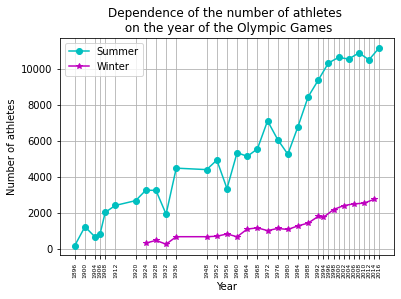

In [11]:
dataSummer = df.loc[df['Season'] == 'Summer'][['ID', 'Year']].drop_duplicates()['Year'].value_counts().sort_index()
dataWinter = df.loc[df['Season'] == 'Winter'][['ID', 'Year']].drop_duplicates()['Year'].value_counts().sort_index()
print(dataSummer)
years = df['Year'].drop_duplicates()
plt.plot(dataSummer, '-o' , label = 'Summer', color = "c") 
plt.plot(dataWinter, '-*', label = 'Winter', color = "m")
plt.xlabel('Year')
plt.ylabel('Number of athletes')
plt.title('Dependence of the number of athletes \n on the year of the Olympic Games') 
plt.grid(True) 
plt.gca().xaxis.set_ticks(years)
plt.xticks(rotation=90, fontsize = 6) 
plt.legend()
plt.show()  

Similarly, look at how the number of countries participating in the games and sports changed depending on the year of the Olympics (separately for the summer and winter games).

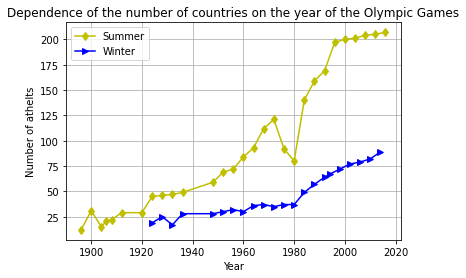

In [12]:
dataSummer = df.loc[df['Season'] == 'Summer'][['NOC', 'Year']].drop_duplicates()['Year'].value_counts().sort_index()
dataWinter = df.loc[df['Season'] == 'Winter'][['NOC', 'Year']].drop_duplicates()['Year'].value_counts().sort_index()
plt.plot(dataSummer, '-d' , label = 'Summer', color = "y") 
plt.plot(dataWinter, '->', label = 'Winter', color = "b")
plt.xlabel('Year')
plt.ylabel('Number of athelts')
plt.title('Dependence of the number of countries on the year of the Olympic Games') 
plt.grid(True) 
plt.legend()
plt.show() 

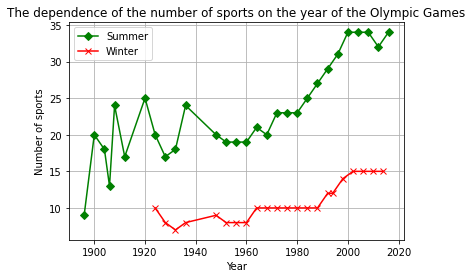

In [13]:
dataSummer = df.loc[df['Season'] == 'Summer'][['Sport', 'Year']].drop_duplicates()['Year'].value_counts().sort_index()
dataWinter = df.loc[df['Season'] == 'Winter'][['Sport', 'Year']].drop_duplicates()['Year'].value_counts().sort_index()
plt.plot(dataSummer, '-D' , label = 'Summer', color = "g") 
plt.plot(dataWinter, '-x', label = 'Winter', color = "r")
plt.xlabel('Year')
plt.ylabel('Number of sports')
plt.title('The dependence of the number of sports on the year of the Olympic Games') 
plt.grid(True) 
plt.legend()
plt.show() 

In which sports did Ukraine win medals at the 2012 Olympic Games? Construct a bar graph that ranks the sports in descending order of the number of medals won.

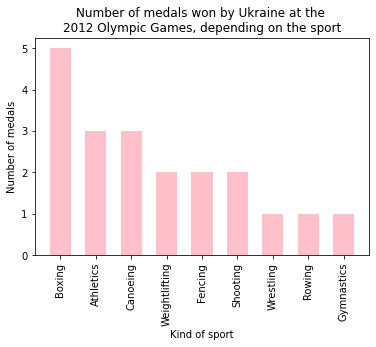

In [14]:
ukraineMedal = df.loc[(df['Year']==2012)&(df['Team'].str.contains('Ukraine'))][['Sport', 'Medal', 'Event']].drop_duplicates()[['Sport', 'Medal']].dropna()['Sport'].value_counts()
plt.bar(ukraineMedal.index, ukraineMedal.values, width = 0.6, color = 'pink')
plt.xticks(rotation=90) 
plt.xlabel('Kind of sport')
plt.ylabel('Number of medals')
plt.title('Number of medals won by Ukraine at the \n2012 Olympic Games, depending on the sport') 
plt.show()

How many gold, silver, and bronze medals did Ukraine win in each sport at the 2012 Olympics? Use the pivot_table method.

In [16]:
ukraineMedal = df.loc[(df['Year']==2012)&(df['Team'].str.contains('Ukraine'))][['Sport', 'Medal', 'Event']].drop_duplicates()[['Sport', 'Medal']]
medals = df.loc[(df['Year']==2012)&(df['Team'].str.contains('Ukraine'))].dropna()['Medal']
ukraineMedal.pivot_table(index = ['Sport'], columns = medals, values = ['Medal'], aggfunc='count', fill_value=0)

Medal            
Medal         Bronze Gold Silver
Sport                           
Athletics          2    0      1
Boxing             2    2      1
Canoeing           0    1      2
Fencing            1    1      0
Gymnastics         1    0      0
Rowing             0    1      0
Shooting           2    0      0
Weightlifting      1    1      0
Wrestling          0    0      1

Which countries won the most medals at the 2016 Olympics? Sort the countries by the number of gold medals won, leave only the top 10 countries and plot the following view

[46 27 26 19 17 12 10  9  8  8]


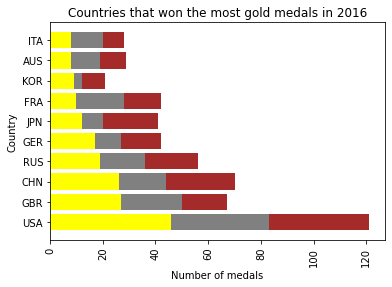

In [15]:
ukraineMedal = df.loc[(df['Year']==2016)][['NOC', 'Sport', 'Medal', 'Event']].drop_duplicates()[['NOC', 'Medal']]
medals = ukraineMedal.dropna()['Medal']
newUkraineMedal = ukraineMedal.pivot_table(index = ['NOC'], columns = medals, values = ['Medal'], aggfunc='count', fill_value=0).sort_values(by = ('Medal', 'Gold'), ascending = False).head(10)
newUkraineMedal = newUkraineMedal.reindex(columns=[('Medal', 'Gold'), ('Medal', 'Silver'), ('Medal', 'Bronze')])
print(newUkraineMedal.values[:,0])
plt.barh(newUkraineMedal.index, newUkraineMedal.values[:,0], color = 'yellow')
plt.barh(newUkraineMedal.index, newUkraineMedal.values[:,1], color = 'grey',  left = newUkraineMedal.values[:,0])
plt.barh(newUkraineMedal.index, newUkraineMedal.values[:,2], color = 'brown', left = newUkraineMedal.values[:,1]+newUkraineMedal.values[:,0])
plt.xticks(rotation=90) 
plt.xlabel('Number of medals')
plt.ylabel('Country')
#plt.gca().invert_yaxis()
plt.title('Countries that won the most gold medals in 2016');
# plt.show()

What is the percentage of men and women among all athletes for all years separately for the summer and winter games?

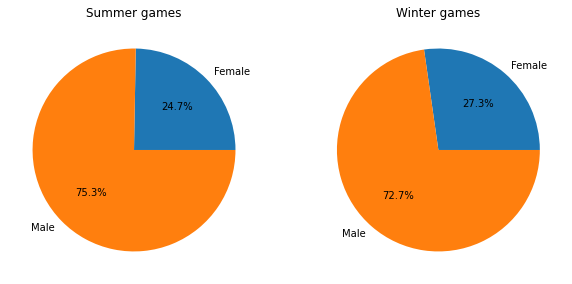

In [16]:
dataSummer = df.loc[df['Season'] == 'Summer'][['Sex', 'Name']].drop_duplicates()['Sex'].value_counts().sort_index()
dataWinter = df.loc[df['Season'] == 'Winter'][['Sex', 'Name']].drop_duplicates()['Sex'].value_counts().sort_index()
plt.figure(figsize=(10,6))
plt.subplot(1, 2, 1)
plt.pie(dataSummer, labels = ['Female', 'Male'], autopct='%1.1f%%') 
plt.title('Summer games')
plt.subplot(1, 2, 2)
plt.pie(dataWinter, labels = ['Female', 'Male'], autopct='%1.1f%%') 
plt.title('Winter games')
plt.show() 